Dashboard Tugas Besar Pemrograman SQL untuk Big Data

Import library yang digunakan

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql

In [13]:
connection = pymysql.connect(host="localhost", 
                             port=3307, 
                             user="root", 
                             passwd="melikacantik", database="tubes_basdat")
cursor = connection.cursor()

In [14]:
cursor.execute("select * from review_table")
review_table = cursor.fetchall()
cursor.execute("select * from product_table")
product_table = cursor.fetchall()
cursor.execute("select * from time_table")
time_table = cursor.fetchall()


Dashboard #1 Rata-rata rating perkategori

In [15]:
cursor.execute("select * from average_rating_dashboard")
average_rating_dahsboard = cursor.fetchall()

In [22]:
category = []
for value in average_rating_dahsboard:
    category.append(value[0])

average_rating = []
for value in average_rating_dahsboard:
    average_rating.append(value[1])

data={'category':category,'rating':average_rating}
df=pd.DataFrame(data)



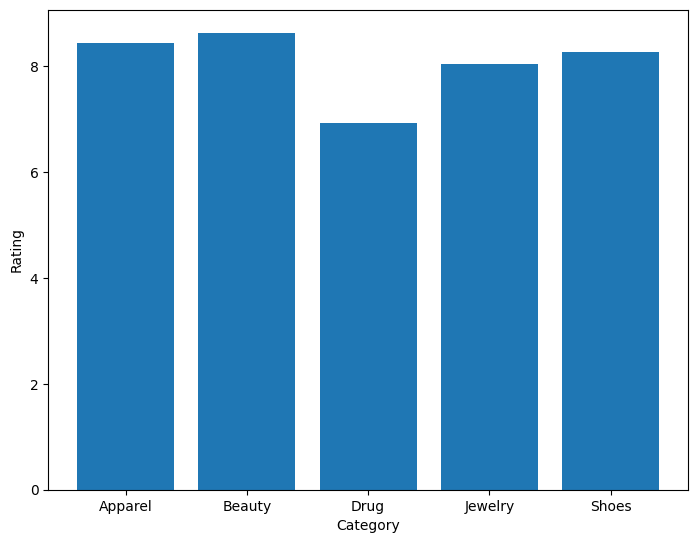

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Category')
ax.set_ylabel('Rating')

#yang y duluan baru x
ax.bar(df['category'], df['rating'])
plt.show()


Dashboard #2 votes perbarang

In [31]:
cursor.execute("select * from vote_score_dashboard")
vote_score_dahsboard = cursor.fetchall()

In [32]:
vote_score_dahsboard

(('Guanfacine', 'Drug', 192),
 ('Effexor XR', 'Drug', 166),
 ('Cialis', 'Drug', 132),
 ('Estradiol', 'Drug', 128),
 ('Buprenorphine', 'Drug', 125),
 ("Phillips' Milk of Magnesia", 'Drug', 120),
 ('Eflornithine', 'Drug', 99),
 ('Ledipasvir / sofosbuvir', 'Drug', 94),
 ('Alprazolam', 'Drug', 87),
 ('Mobic', 'Drug', 82))